In [ ]:
!pip install pandas scikit-learn matplotlib

In [2]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval

# Load the embeddings
datafile_path = "nods_page_section_rows.csv"
df = pd.read_csv(datafile_path)

# Convert to a list of lists of floats
matrix = np.array(df.embedding.apply(literal_eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(1786, 2)

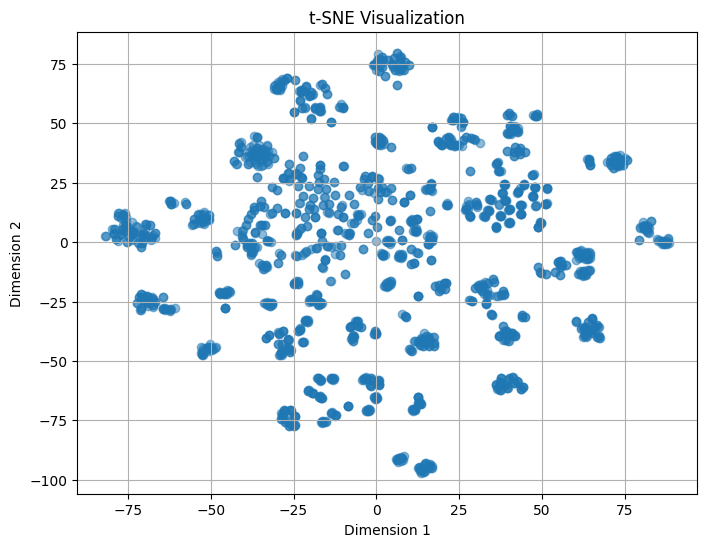

In [10]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(vis_dims[:, 0], vis_dims[:, 1], alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

In [18]:
import pandas as pd
from IPython.display import FileLink  # Import FileLink from IPython.display

# Load the embeddings
datafile_path = "nods_page_section_rows.csv"
df = pd.read_csv(datafile_path)

titles = df['content'].str.split('#').str[1].str.split('*').str[0].str.strip()

# Create a DataFrame with the t-SNE transformed data and content column
tsne_df = pd.DataFrame(vis_dims, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Slug'] = df['slug']  # Assuming the column name in the original data is 'content'
tsne_df['Title'] = titles

# Export the DataFrame to a CSV file
tsne_df.to_csv('tsne_data.csv', index=False)

# Create a link for downloading the CSV file
FileLink('tsne_data.csv')

/Users/hns/hack/projects/embeddingsAnalysisGeoExplore/tsne_data.csv